In [2]:
from pynq import Overlay
from pynq import allocate
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Load the bitstream
ol = Overlay("dma.bit")

# Define constants
data_size = 1024  # Number of samples per transfer
dma = ol.axi_dma  # DMA interface

# Create buffers for DMA transfer
output_buffer = allocate(shape=(data_size,), dtype=np.uint32)

# Function to process and display ADC data
def display_adc_data():
    try:
        # Initialize the plot
        plt.figure(figsize=(10, 6))
        
        while True:
            # Start a DMA transfer
            dma.recvchannel.transfer(output_buffer)
            dma.recvchannel.wait()
            
            # Process data: Keep only the lower 12 bits
            processed_data = output_buffer & 0x0FFF

            # Clear the previous plot
            clear_output(wait=True)
            
            # Plot the data
            plt.clf()
            plt.plot(processed_data, label="ADC Data")
            plt.title("ADC Channel 1 - Real-Time")
            plt.xlabel("Sample Index")
            plt.ylabel("Value")
            plt.grid(True)
            plt.legend()
            plt.pause(0.01)  # Pause to update the plot

    except KeyboardInterrupt:
        print("Streaming stopped.")
        plt.close()



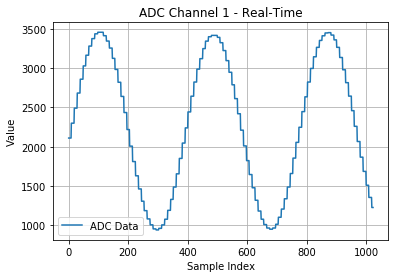

In [ ]:
# Run the function to start streaming
display_adc_data()
